# Image Classification on Oxford IIIT Pet Image dataset

###  1. Sem data augmentation
#### 1.1 classificacao binaria
#####   1.1.1 CNN de raiz
 

#### 1.2 classificacao multi-classe
#####   1.2.1 CNN de raiz
#####   1.2.2rede pre-treinada do Keras

###  2. Com data augmentation
#### 2.1 classificacao binaria
#####   2.1.1 CNN de raiz

#### 2.2 classificacao multi-classe
#####   2.2.1 CNN de raiz
#####   2.2.2 rede pre-treinada do Keras


## Imports

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve
import pickle
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
import pandas as pd

from keras.preprocessing import image

C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ruben\AppData\Local\Conti

In [2]:
def plot_history(hist):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    h=hist.history

    ax1.plot(h["loss"], label='Loss')
    ax1.plot(h["val_loss"], label='Val Loss')
    ax1.legend()

    ax2.plot(h["acc"], label='Accuracy')
    ax2.plot(h["val_acc"], label='Val Acurracy')

    ax2.axis(xmin=-1,ymax=1, ymin=0)
    ax2.axhline(y=.5, color='r')
    ax2.legend()

    plt.show()

### Check for GPU


## Data loading

In [3]:
D=pickle.load(open('Oxford-IIIT-Pet_Dics.p','rb'))

#print(D["classDic"].keys())
#print(D["classDic"])

N_imagens = len(D["filesDic"].keys())
class_Dict = dict(D.get('classDic'))
files_Dict = dict(D.get('filesDic'))


In [4]:
df = pd.DataFrame(files_Dict).T
df = df.reset_index()
df.columns =["image", "species","breed", "target", "imgDim", "bndBox","foldTrain"]
df

,image,species,breed,target,imgDim,bndBox,foldTrain
0,Abyssinian_1.jpg,cat,Abyssinian,25,"(400, 600, 3)","[333, 72, 92, 86]",True
1,Abyssinian_10.jpg,cat,Abyssinian,25,"(500, 375, 3)","[72, 105, 216, 186]",True
2,Abyssinian_100.jpg,cat,Abyssinian,25,"(500, 394, 3)","[151, 71, 184, 196]",True
3,Abyssinian_101.jpg,cat,Abyssinian,25,"(313, 450, 3)","[54, 36, 265, 199]",True
4,Abyssinian_102.jpg,cat,Abyssinian,25,"(465, 500, 3)","[23, 27, 302, 293]",True
...,...,...,...,...,...,...,...
7385,yorkshire_terrier_95.jpg,dog,yorkshire_terrier,24,"(332, 500, 3)",[],False
7386,yorkshire_terrier_96.jpg,dog,yorkshire_terrier,24,"(335, 500, 3)",[],False
7387,yorkshire_terrier_97.jpg,dog,yorkshire_terrier,24,"(500, 335, 3)",[],False
7388,yorkshire_terrier_98.jpg,dog,yorkshire_terrier,24,"(375, 500, 3)",[],False


In [5]:
df = df[["image", "breed", "species", "foldTrain"]]


In [6]:
df_train = df[df["foldTrain"] == True]
df_test = df[df["foldTrain"] == False]
#print(len(df_test), "+", len(df_train), "=", len(df_test) + len(df_train)) 


## Classificação binaria e multi-classe sem data augmentation

### Classificacao Binaria sem data augmentation
* Criar Rede CNN de raiz

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

# binary
datagen = image.ImageDataGenerator(rescale=1/255., validation_split=0.2)
train_generatorB = datagen.flow_from_dataframe(dataframe=df_train, directory= 'images/',
                                              x_col='image', y_col='species',
                                              target_size=(224,224),
                                              class_mode='categorical', batch_size=100, 
                                              subset='training')

test_generatorB = datagen.flow_from_dataframe(dataframe=df_test, directory= 'images/',
                                                   x_col='image', y_col='species',
                                                   target_size=(224,224), class_mode='categorical',
                                                   batch_size=100, subset='validation',seed=7)

Found 2949 validated image filenames belonging to 2 classes.
Found 740 validated image filenames belonging to 2 classes.


In [8]:
# Rede Cnn para a classificacao binaria
binaryCnn = models.Sequential()
binaryCnn.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(224, 224, 3), padding="same"))
binaryCnn.add(layers.AveragePooling2D((2, 2)))
binaryCnn.add(layers.Conv2D(64, (5, 5), activation='relu'))
binaryCnn.add(layers.AveragePooling2D((2, 2)))
binaryCnn.add(layers.Conv2D(128, (1, 1), activation='relu'))
binaryCnn.add(layers.Flatten())
binaryCnn.add(layers.Dense(512, activation='relu'))
binaryCnn.add(layers.Dense(2, activation='softmax'))

binaryCnn.summary()

binaryCnn.compile(optimizer="nadam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
average_pooling2d (AveragePo (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 64)      51264     
_________________________________________________________________
average_pooling2d_1 (Average (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 128)       8320      
_________________________________________________________________
flatten (Flatten)            (None, 373248)            0         
_________________________________________________________________
dens

In [ ]:
hist = binaryCnn.fit(train_generatorB, batch_size=100, epochs=5, validation_data=test_generatorB)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5


In [19]:
plot_history(hist)

dict_keys(['loss', 'acc'])


AttributeError: 'dict' object has no attribute 'history'

In [21]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve

predicted = binaryCnn.predict(test_generatorB)
pred = np.argmax(predicted, axis=1)

print('Number of erros:', np.sum(pred != test_generatorB.classes))
confusion_matrix(pred, test_generatorB.classes)

Number of erros: 3605


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Classificacao Multi-class
* Criar Rede CNN de raiz

In [13]:
# multi.class
datagen = image.ImageDataGenerator(rescale=1/255., validation_split=0.2)
train_generator = datagen.flow_from_dataframe(dataframe=df, directory= 'images/',
                                              x_col='image', y_col='breed',
                                              target_size=(224,224),
                                              class_mode='categorical', batch_size=100, 
                                              subset='training')

test_generator = datagen.flow_from_dataframe(dataframe=df, directory= 'images/',
                                                   x_col='image', y_col='breed',
                                                   target_size=(224,224), class_mode='categorical',
                                                   batch_size=10, subset='validation',seed=7)



Found 5912 validated image filenames belonging to 37 classes.
Found 1478 validated image filenames belonging to 37 classes.


In [14]:
Multi_Cnn = models.Sequential()

Multi_Cnn.add(layers.Conv2D(6, (5, 5), activation='relu',
                            input_shape=(224, 224, 3), padding="same"))
Multi_Cnn.add(layers.AveragePooling2D((2, 2)))
Multi_Cnn.add(layers.Conv2D(16, (5, 5), activation='relu'))
Multi_Cnn.add(layers.AveragePooling2D((2, 2)))
Multi_Cnn.add(layers.Conv2D(120, (1, 1), activation='relu'))
Multi_Cnn.add(layers.Flatten())
Multi_Cnn.add(layers.Dense(64, activation='relu'))
Multi_Cnn.add(layers.Dense(37, activation='softmax'))  # 37 breeds

Multi_Cnn.summary()

Multi_Cnn.compile(optimizer="nadam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 224, 224, 6)       456       
_________________________________________________________________
average_pooling2d_6 (Average (None, 112, 112, 6)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 16)      2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 54, 54, 120)       2040      
_________________________________________________________________
flatten_3 (Flatten)          (None, 349920)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                22394944  
__________

In [16]:
hist = Multi_Cnn.fit(train_generator, batch_size=100, 
                     epochs=5, validation_data=test_generator)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60/60 [==============================] - 298s 5s/step - loss: 4.2251 - acc: 0.0455 - val_loss: 5.6703 - val_acc: 0.0000e+00
Epoch 2/5
60/60 [==============================] - 317s 5s/step - loss: 3.3685 - acc: 0.0541 - val_loss: 8.2800 - val_acc: 0.0000e+00
Epoch 3/5
60/60 [==============================] - 313s 5s/step - loss: 3.2194 - acc: 0.0841 - val_loss: 9.2550 - val_acc: 0.0000e+00
Epoch 4/5
60/60 [==============================] - 315s 5s/step - loss: 3.1320 - acc: 0.1045 - val_loss: 10.9704 - val_acc: 0.0000e+00
Epoch 5/5
60/60 [==============================] - 301s 5s/step - loss: 2.9596 - acc: 0.1516 - val_loss: 11.6265 - val_acc: 0.0000e+00


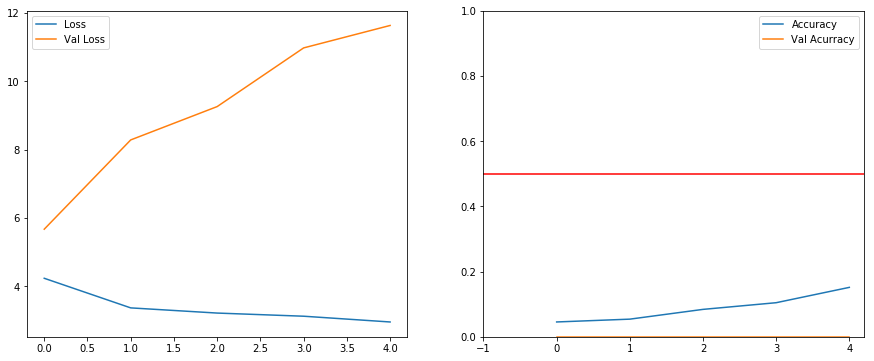

In [17]:
plot_history(hist)


Number of erros: 1478


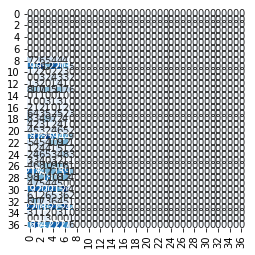

In [18]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve
import itertools

predicted = Multi_Cnn.predict(test_generator)
p = np.argmax(predicted, axis=1)

print('Number of erros:', np.sum(p != test_generator.classes))

cm = confusion_matrix(p, test_generator.classes)

import seaborn as sns
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)


### 1.2.2 Rede pre-treinada do Keras
* Criar Rede CNN a apartir de outra rede

In [19]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

#InceptionResNetV2
base = MobileNetV2(weights='imagenet', input_shape=(224, 224, 3))
base.trainable = False

Multi_Cnn_base = models.Sequential()
Multi_Cnn_base.add(base)
Multi_Cnn_base.add(layers.Flatten())
Multi_Cnn_base.add(layers.Dense(37, activation='softmax'))  # 37 breeds

Multi_Cnn_base.summary()
Multi_Cnn_base.compile(optimizer="nadam",
                     loss="categorical_crossentropy",
                     metrics=["accuracy"])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 1000)              3538984   
_________________________________________________________________
flatten_4 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 37)                37037     
Total params: 3,576,021
Trainable params: 37,037
Non-trainable params: 3,538,984
_________________________________________________________________


In [ ]:
hist_base = Multi_Cnn_base.fit(train_generator, batch_size=100, 
                               epochs=5, validation_data=test_generator)

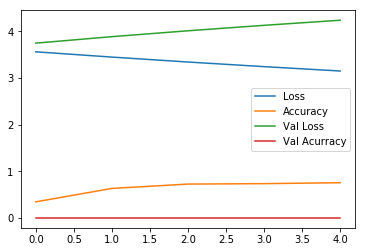

Number of erros: 1478


In [47]:
plot_history(hist_base)

Number of erros: 1478


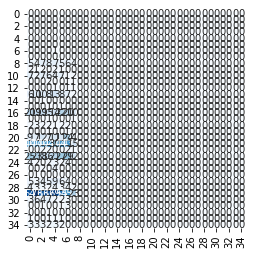

In [22]:
import seaborn as sns

predicted = Multi_Cnn_base.predict(test_generator)
p = np.argmax(predicted, axis=1)
cm = confusion_matrix(p, test_generator.classes)

print('Number of erros:', np.sum(p != test_generator.classes))
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)


#### Tanto na classificacao binaria como a classificacao multi-class houve dificuldades ao realizar o treino, no entanto podemos verificar que ao utilizar uma rede Cnn ja pre-treinada do keras obteve-se melhores resultados.


## Com recurso a data augmentation

### Classificacao Binaria
* Criar Rede CNN de raiz

In [23]:
datagenAug = image.ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest",
                                   rescale=1/255., validation_split=0.2)

train_generatorAugB = datagenAug.flow_from_dataframe(dataframe=df_train, directory= 'images/',
                                              x_col='image', y_col='species',
                                              target_size=(224,224),
                                              class_mode='categorical', batch_size=100, 
                                              subset='training')

test_generatorAugB = datagenAug.flow_from_dataframe(dataframe=df_test, directory= 'images/',
                                              x_col='image', y_col='species',
                                              target_size=(224,224),
                                              class_mode='categorical', batch_size=100, 
                                              subset='training')


Found 2949 validated image filenames belonging to 2 classes.
Found 2964 validated image filenames belonging to 2 classes.


In [ ]:
# Rede - binary   -  binaryCnn 
hist = binaryCnn.fit(train_generatorAugB, batch_size=100, 
                     epochs=5, validation_data=test_generatorAugB)

In [ ]:
plot_history(hist)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve

predicted = binaryCnn.predict(testGen)
pred = np.argmax(predicted, axis=1)

print('Number of erros:', np.sum(pred != testGen.classes))
confusion_matrix(pred, testGen.classes)

### Classificacao Multi-class com Data argumentation
* Criar Rede CNN de raiz

In [54]:
datagenAug = image.ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest",
                                   rescale=1/255., validation_split=0.2)

train_generatorAug = datagenAug.flow_from_dataframe(dataframe=df_train, directory= 'images/',
                                              x_col='image', y_col='breed',
                                              target_size=(224,224),
                                              class_mode='categorical', batch_size=100, 
                                              subset='training')

test_generatorAug = datagenAug.flow_from_dataframe(dataframe=df_test, directory= 'images/',
                                              x_col='image', y_col='breed',
                                              target_size=(224,224),
                                              class_mode='categorical', batch_size=100, 
                                              subset='training')

Found 2949 validated image filenames belonging to 37 classes.
Found 2964 validated image filenames belonging to 37 classes.


In [60]:
# train_generatorAug, test_generatorAug
# Multi- class Cnn-   Multi_Cnn 
hist = Multi_Cnn.fit(train_generatorAug, batch_size=100, 
                     epochs=5, validation_data=test_generatorAug)

Epoch 1/5
30/30 [==============================] - 208s 7s/step - loss: 3.5523 - acc: 0.0346 - val_loss: 3.4442 - val_acc: 0.0334
Epoch 2/5
30/30 [==============================] - 225s 8s/step - loss: 3.4060 - acc: 0.0560 - val_loss: 3.4264 - val_acc: 0.0567
Epoch 3/5
30/30 [==============================] - 227s 8s/step - loss: 3.3560 - acc: 0.0610 - val_loss: 3.3461 - val_acc: 0.0695
Epoch 4/5
30/30 [==============================] - 221s 7s/step - loss: 3.2953 - acc: 0.0638 - val_loss: 3.3753 - val_acc: 0.0533
Epoch 5/5
30/30 [==============================] - 220s 7s/step - loss: 3.2902 - acc: 0.0773 - val_loss: 3.3079 - val_acc: 0.0698


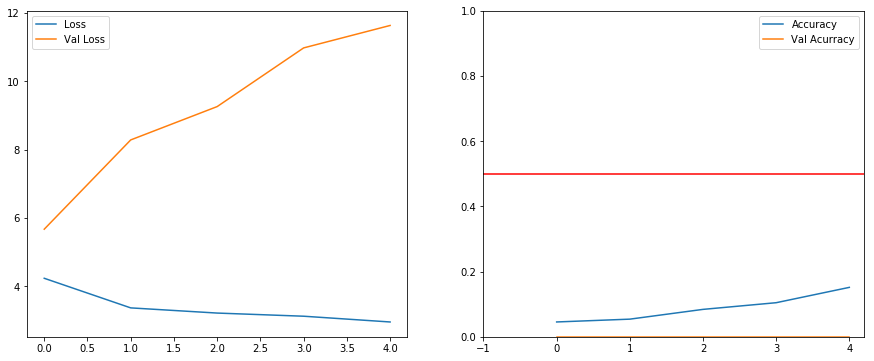

In [25]:
plot_history(hist)

Number of erros: 2872


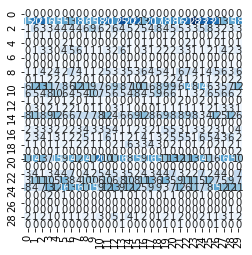

In [62]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve
import itertools
import seaborn as sns

predicted = Multi_Cnn.predict(test_generatorAug)
p = np.argmax(predicted, axis=1)
cm = confusion_matrix(p, test_generatorAug.classes)

print('Number of erros:', np.sum(p != test_generatorAug.classes))
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

##  1.2.2 Rede pre-treinada do Keras
* Criar Rede CNN a apartir de outra rede

In [64]:
hist_base = Multi_Cnn_base.fit(train_generatorAug, batch_size=100, 
                               epochs=5, validation_data=test_generatorAug)

Epoch 1/5
30/30 [==============================] - 704s 23s/step - loss: 3.5923 - acc: 0.1224 - val_loss: 3.5889 - val_acc: 0.0337
Epoch 2/5
30/30 [==============================] - 704s 23s/step - loss: 3.5512 - acc: 0.3608 - val_loss: 3.5675 - val_acc: 0.0337
Epoch 3/5
30/30 [==============================] - 737s 25s/step - loss: 3.5118 - acc: 0.4551 - val_loss: 3.5496 - val_acc: 0.0337
Epoch 4/5
30/30 [==============================] - 802s 27s/step - loss: 3.4754 - acc: 0.5317 - val_loss: 3.5344 - val_acc: 0.0324
Epoch 5/5
30/30 [==============================] - 791s 26s/step - loss: 3.4412 - acc: 0.5398 - val_loss: 3.5214 - val_acc: 0.0337


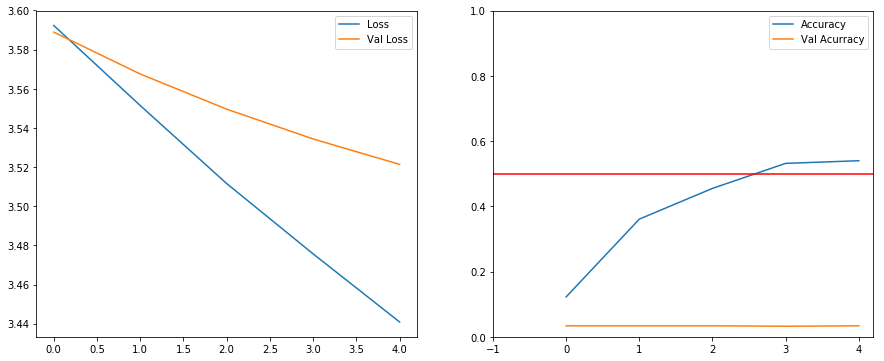

In [66]:
plot_history(hist_base)

Number of erros: 2864


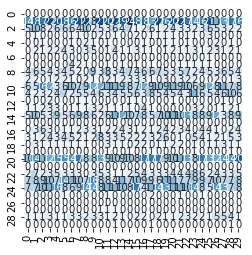

In [67]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve
import itertools
import seaborn as sns

predicted = Multi_Cnn.predict(test_generatorAug)
p = np.argmax(predicted, axis=1)

print('Number of erros:', np.sum(p != test_generatorAug.classes))

cm = confusion_matrix(p, test_generatorAug.classes)
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)


#### Ao compararmos as redes com e sem augumentation podemos verificar que com augmentation conseguimos obter melhores resultados porque as redes conseguem treinar melhor com mais dados
#### Infelizmente os treinos das redes nao poderam ser concretizadas devido ao tempo que demoraram